# Predict employment termination

## Introduction

### This notebook will go through different machine learning models to predict employment termination based on knowledge of an employees work in the company.

# Importing Python libraries

In [2]:
# importing libraries for data handling,analysis and data visualisations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter


# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

# Importing the data

In [3]:
df = pd.read_csv('MFG10YearTerminationData.csv')

# Data Description and Exploratory Visualisations

In [4]:
# look at the data

# Check size of the dataset
df.shape

(49653, 18)

In [5]:
# Data types
df.dtypes

EmployeeID              int64
recorddate_key         object
birthdate_key          object
orighiredate_key       object
terminationdate_key    object
age                     int64
length_of_service       int64
city_name              object
department_name        object
job_title              object
store_name              int64
gender_short           object
gender_full            object
termreason_desc        object
termtype_desc          object
STATUS_YEAR             int64
STATUS                 object
BUSINESS_UNIT          object
dtype: object

In [6]:
# A prelimiary look at the individual columns in the training set
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [7]:
df.tail()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49652,8321,12/1/2014 0:00,11/28/1994,11/24/2013,12/30/2014,20,1,Grand Forks,Customer Service,Cashier,13,F,Female,Layoff,Involuntary,2014,TERMINATED,STORES


# Observations so far

1. Data is a mix of string and integer values. 
2. Some features with strings should be dates. These should be converted to date and time if used.  The features are recorddate_key, birthdate_key, orighiredate_key, and terminationdate_key.
3. EmployeeID is for identification. It shouldn't be used for training the machine learning model, but can be useful for filtering rows.
4. The age can be found by usng the record date and the birth date. So one set may be dropped.
5. The length of service can be found using the record date and the original hire date. So one set may be dropped.
6. The termination date uses 1/1/1900 if the employee is still active. 
7. The store_name is given as a number, even though it is a nominal categorical feature. The store name itself is unlikely to be cause of employment termination, but particular feature values may be associated with particular stores. It could be an interesting separate investigation.
8. Gender is given in short and full. Only one of them is necessary so one will be dropped.
9. An employee whose employment is terminated has valid entries for termination date, termination reason and termination type. These 3 features should not be used for training the machine learning model because the features are results, not predictors, of employment termination. They may be interesting as labels, however, if the prediction goal changes.
10. The status_year column repeats information in the record date.
11. The status column is the label to predict. It should be converted from string to numerical.

In [8]:
# Summarise the numerical data
df.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000,49653.000000
mean,4859.495740,42.077035,10.434596,27.297605,2010.612612
std,1826.571142,12.427257,6.325286,13.514134,2.845577
min,1318.000000,19.000000,0.000000,1.000000,2006.000000
25%,3360.000000,31.000000,5.000000,16.000000,2008.000000
50%,5031.000000,42.000000,10.000000,28.000000,2011.000000
75%,6335.000000,53.000000,15.000000,42.000000,2013.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000


In [9]:
# Summarise the non-numerical data
df.describe(include=['O'])

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,city_name,department_name,job_title,gender_short,gender_full,termreason_desc,termtype_desc,STATUS,BUSINESS_UNIT
count,49653,49653,49653,49653,49653,49653,49653,49653,49653,49653,49653,49653,49653
unique,130,5342,4415,1055,40,21,47,2,2,4,3,2,2
top,12/31/2013 0:00,8/4/1954,10/16/2005,1/1/1900,Vancouver,Meats,Meat Cutter,F,Female,Not Applicable,Not Applicable,ACTIVE,STORES
freq,5215,40,50,42450,11211,10269,9984,25898,25898,48168,48168,48168,49068


# A couple more observations about the data
1. There are only 2 business unit values, so the feature can be converted to numerical Boolean.
2. The city, department name and job title features have multiple unique values. There may be a way to categorise these features.

In [10]:
# Create new categories for job titles

# Look at full list of job titles and frequency
df.job_title.value_counts()

Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
Baker                              8096
Cashier                            6816
Shelf Stocker                      5622
Customer Service Manager            306
Processed Foods Manager             289
Bakery Manager                      285
Meats Manager                       285
Produce Manager                     278
Store Manager                       271
Recruiter                            62
HRIS Analyst                         55
Accounting Clerk                     50
Benefits Admin                       35
Accounts Receiveable Clerk           30
Labor Relations Analyst              30
Trainer                              26
Accounts Payable Clerk               25
Investment Analyst                   20
Compensation Analyst                 20
Auditor                              20
Systems Analyst                      20
Corporate Lawyer                     17


In [11]:
# The 47 jobs can be separated according to corporate hierarchy
# Use employee, manager, and combined executives and board 
employee = ['Meat Cutter', 'Dairy Person', 'Produce Clerk', 'Baker', 'Cashier',
            'Shelf Stocker', 'Recruiter', 'HRIS Analyst', 'Accounting Clerk',
            'Benefits Admin', 'Labor Relations Analyst', 'Accounts Receiveable Clerk',
            'Accounts Payable Clerk', 'Auditor', 'Compensation Analyst',
            'Investment Analyst', 'Systems Analyst', 'Corporate Lawyer', 'Legal Counsel']

manager = ['Customer Service Manager', 'Processed Foods Manager', 'Meats Manager',
           'Bakery Manager', 'Produce Manager', 'Store Manager', 'Trainer', 'Dairy Manager']

executive = ['Exec Assistant, Finance', 'Exec Assistant, Legal Counsel',
             'CHief Information Officer', 'CEO', 'Exec Assistant, Human Resources',
             'Exec Assistant, VP Stores']

board = ['VP Stores', 'Director, Recruitment', 'VP Human Resources', 'VP Finance',
         'Director, Accounts Receivable', 'Director, Accounting',
         'Director, Employee Records', 'Director, Accounts Payable',
         'Director, HR Technology', 'Director, Investments',
         'Director, Labor Relations', 'Director, Audit', 'Director, Training',
         'Director, Compensation']

# Check all jobs were entered into the categories
total = len(employee) + len(manager) + len(executive) + len(board)
print('Total jobs categorised:', total, 'out of 47')

Total jobs categorised: 47 out of 47


In [12]:
# Make a copy of job titles in a new column
df['Hierarchy'] = df.job_title

# Replace the job titles in Hierarchy
# The corporate hierarchy intrinsically has order from small to large, 
# so ordinal numbers may be used
df.Hierarchy = df.Hierarchy.replace(employee, 0)
df.Hierarchy = df.Hierarchy.replace(manager, 1)
df.Hierarchy = df.Hierarchy.replace(executive, 2)
df.Hierarchy = df.Hierarchy.replace(board, 3)

# Check that the replacement went to plan
df.Hierarchy.value_counts()

0    47739
1     1749
3      105
2       60
Name: Hierarchy, dtype: int64

In [13]:
# Create new categories for department names

# Look at full list of departments and frequency
df.department_name.value_counts()

Meats                     10269
Dairy                      8599
Produce                    8515
Bakery                     8381
Customer Service           7122
Processed Foods            5911
Store Management            271
Executive                   100
Recruitment                  72
HR Technology                64
Accounting                   59
Employee Records             44
Accounts Receiveable         39
Accounts Payable             34
Labor Relations              34
Training                     30
Compensation                 24
Investment                   24
Audit                        24
Information Technology       20
Legal                        17
Name: department_name, dtype: int64

In [14]:
# The departments can be separated according to whether they serve the customer
# or the business
serve_cus = ['Meats', 'Dairy', 'Produce', 'Bakery', 'Customer Service', 'Processed Foods']

serve_biz = ['Store Management', 'Executive', 'Recruitment', 'HR Technology',
             'Accounting', 'Employee Records', 'Accounts Receiveable',
             'Accounts Payable', 'Labor Relations', 'Training', 'Compensation',
             'Audit', 'Investment', 'Information Technology', 'Legal']

# Check all departments were entered into the categories
total = len(serve_cus) + len(serve_biz)
print('Total departments categorised:', total, 'out of 21')

Total departments categorised: 21 out of 21


In [15]:
# Make a copy of department names in a new column
df['Service_to'] = df.department_name

# Replace the department names in Service_to
df.Service_to = df.Service_to.replace(serve_cus, 'Customer')
df.Service_to = df.Service_to.replace(serve_biz, 'Business')

# Check the replacement went to plan
df.Service_to.value_counts()

Customer    48797
Business      856
Name: Service_to, dtype: int64

In [16]:
# Create new categories for city names

# Look at full list of cities and frequency
df.city_name.value_counts()

Vancouver           11211
Victoria             4885
Nanaimo              3876
New Westminster      3211
Kelowna              2513
Burnaby              2067
Kamloops             2061
Prince George        2048
Cranbrook            1785
Surrey               1560
Richmond             1401
Terrace              1228
Chilliwack           1167
Trail                 925
Langley               901
Vernon                898
Squamish              806
Quesnel               703
Abbotsford            681
North Vancouver       648
Fort St John          621
Williams Lake         617
West Vancouver        613
Port Coquitlam        545
Aldergrove            520
Fort Nelson           322
Nelson                317
New Westminister      254
Grand Forks           236
White Rock            231
Haney                 182
Princeton             136
Dawson Creek          129
Bella Bella           126
Ocean Falls            65
Pitt Meadows           57
Cortes Island          43
Valemount              37
Dease Lake  

In [17]:
# The cities are in Canada.
# The cities can be separated according to population size.

# The population data for 2011 was obtained from Statistics Canada
# http://www12.statcan.gc.ca/census-recensement/2016/dp-pd/prof/index.cfm?Lang=E
# Used 2011 as it is the most recent before the last year of this dataset (2015)
city_pop_2011 = {'Vancouver':2313328,
                 'Victoria':344615,
                 'Nanaimo':146574,
                 'New Westminster':65976,
                 'Kelowna':179839,
                 'Burnaby':223218,
                 'Kamloops':85678,
                 'Prince George':71974,
                 'Cranbrook':19319,
                 'Surrey':468251,
                 'Richmond':190473,
                 'Terrace':11486,
                 'Chilliwack':77936,
                 'Trail':7681,
                 'Langley':25081,
                 'Vernon':38180,
                 'Squamish':17479,
                 'Quesnel':10007,
                 'Abbotsford':133497,
                 'North Vancouver':48196,
                 'Fort St John':18609,
                 'Williams Lake':10832,
                 'West Vancouver':42694,
                 'Port Coquitlam':55985,
                 'Aldergrove':12083,
                 'Fort Nelson':3561,
                 'Nelson':10230,
                 'New Westminister':65976,
                 'Grand Forks':3985,
                 'White Rock':19339,
                 'Haney':76052,
                 'Princeton':2724,
                 'Dawson Creek':11583,
                 'Bella Bella':1095,
                 'Ocean Falls':129,
                 'Pitt Meadows':17736,
                 'Cortes Island':1007,
                 'Valemount':1020,
                 'Dease Lake':58,
                 'Blue River':215}
# Population notes
# New Westminister is treated as a misspelling of New Westminster
# Used Haney in Maple Ridge, British Columbia because most of the other cities are in BC
# Used Bella Bella 1 (Indian reserve) for Bella Bella
# Used Central Coast A for Ocean Falls 
# Used Strathcona B for Cortes Island
# Used Dease Lake 9 (Indian reserve) for Dease Lake

# Check dictionary made correctly
print('Cities in dictionary:', len(city_pop_2011), 'out of 40')

Cities in dictionary: 40 out of 40


In [18]:
# Make a copy of city names
df['Pop'] = df.city_name

# Map from city name to population
df.Pop = df.Pop.map(city_pop_2011)

# Make a new column for population category
df['Pop_category'] = df.Pop

# Categorise according to population size
# >= 100,000 is City
# 10,000 to 99,999 is Rural
# < 10,000 is Remote
# Guidance from Australian Institute of Health and Welfare
# http://www.aihw.gov.au/rural-health-rrma-classification/
city_ix = (df['Pop'] >= 100000)
rural_ix = ((df['Pop'] < 100000) & (df['Pop'] >= 10000))
remote_ix = (df['Pop'] < 10000)
df.loc[city_ix, 'Pop_category'] = 'City'
df.loc[rural_ix, 'Pop_category'] = 'Rural'
df.loc[remote_ix, 'Pop_category'] = 'Remote'

# Check the replacement went to plan
df.Pop_category.value_counts()

City      28194
Rural     19542
Remote     1917
Name: Pop_category, dtype: int64

In [19]:
# As the category names are based on population size, the data could be represented
# by an ordinal category instead of a nominal category.
# Convert from nominal to ordinal 
df.Pop_category = df.Pop_category.replace('Remote', 0)
df.Pop_category = df.Pop_category.replace('Rural', 1)
df.Pop_category = df.Pop_category.replace('City', 2)

# Check the replacement went to plan
df.Pop_category.value_counts()

2    28194
1    19542
0     1917
Name: Pop_category, dtype: int64

In [20]:
# Convert STATUS from string to numerical
df.STATUS = df.STATUS.map({'ACTIVE':1, 'TERMINATED':0})

# Data visualisation

In [21]:
# Separate data to avoid one excessively overlapping the other in plots.
# One set for the terminated (out of company) and working (in company)
out_of_co = df[df.STATUS == 0]
in_co = df[df.STATUS == 1]

Text(0.5, 1.0, 'In company')

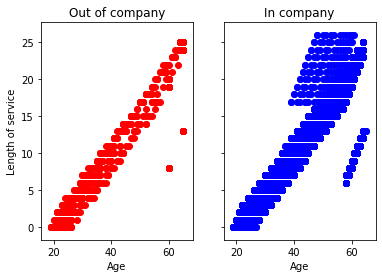

In [22]:
# Start with a broad look at each group in terms of age and length of service
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)

ax1.scatter(out_of_co.age, out_of_co.length_of_service, color='r')
ax1.set_xlabel('Age')
ax1.set_ylabel('Length of service')
ax1.set_title('Out of company')

ax2.scatter(in_co.age, in_co.length_of_service, color='b')
ax2.set_xlabel('Age')
ax2.set_title('In company')

# Observations
People may leave the company after working for any length of time from 0 to 25 years and any age from 20 to 60. Take a closer look at the distribution of ages and service times for terminations.

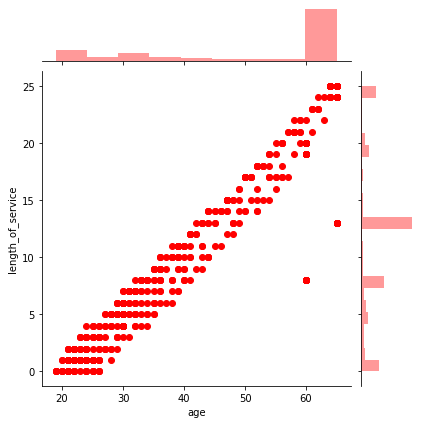

In [23]:
# Scatter plot of out of company dataset, with histograms of the axes
g = sns.jointplot(out_of_co.age, out_of_co.length_of_service, color='r')

# Observations

There appear to be 3 peaks in the age when people stop working. There are 4 major peaks in the length of service before people stop working.
 
1. The largest age peak of above 60 years old overlaps the service peak of 25 years. This would be people who are retiring from the work force.
2. The second largest age peak of 20-25 years old overlaps the service peak of 0 years. This is likely people who are trying jobs to find something they would like.
3. The third age peak of 29-34 overlaps the service peak of 8 years. This is likely people who have become tired of their work and want a career change. It may also be people who have family commitments that force them to change.
4. The largest service peak of around 13 years overlaps with the age peak of above 60 years and with ages between 40-50. The group over 60 years old would be middle are people who changed careers to join the company. 
 

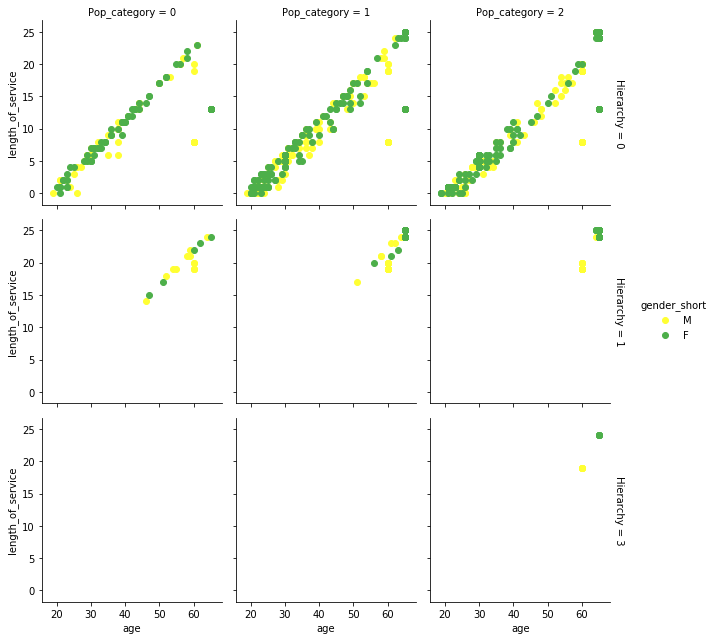

In [24]:
# When someone leaves the company, look at their age, length of service, city size,
# and position in hierarchy. Separated by gender
g = sns.FacetGrid(out_of_co, col='Pop_category', row='Hierarchy', palette='Set1_r', 
                  hue='gender_short', margin_titles=True)
g = (g.map(plt.scatter, 'age', 'length_of_service').add_legend())

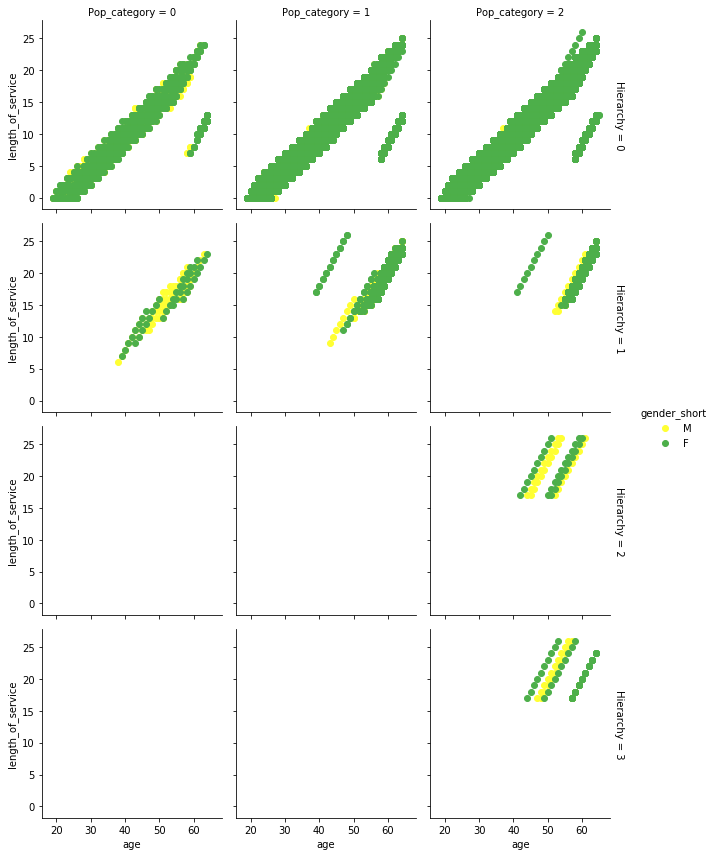

In [25]:
# Do the same for people who are working in the company
g = sns.FacetGrid(in_co, col='Pop_category', row='Hierarchy', palette='Set1_r', 
                  hue='gender_short', margin_titles=True)
g = (g.map(plt.scatter, 'age', 'length_of_service').add_legend())

# Observations

1. Nobody has stopped employment when they were at executive level.
2. Executives and board members only work in cities.
3. There does not appear to be a major difference in employment termination between males and females.
4. Managers and board members stop employment after at least 14 years of service. This means that they were likely internally promoted to those positions.

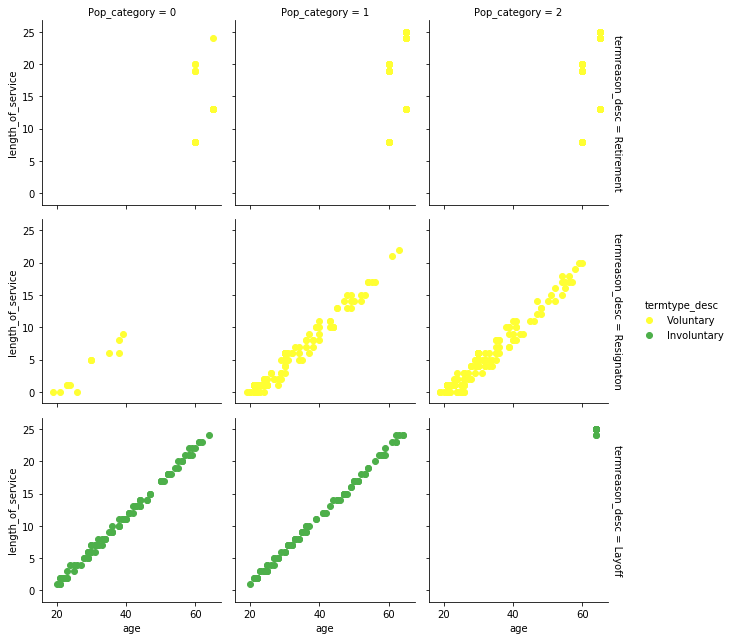

In [26]:
# Out of interest, look at when termination is voluntary or involuntary
g = sns.FacetGrid(out_of_co, col='Pop_category', row='termreason_desc', palette='Set1_r', 
                  hue='termtype_desc', margin_titles=True)
g = (g.map(plt.scatter, 'age', 'length_of_service').add_legend())

# Observations

1. Layoffs occur for all ages and all service lengths in remote and rural areas.
2. Resignations are uncommon in remote areas.
3. As expected, layoffs are involuntary, whereas resignations and retirements are voluntary.

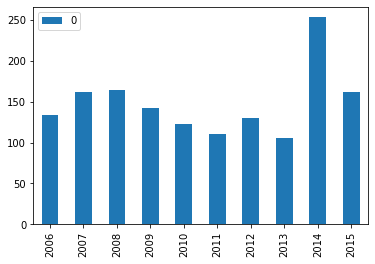

In [27]:
# Out of interest, look at number of terminations per year.
# Count terminations per year
term_per_year = Counter(out_of_co.STATUS_YEAR)
term_per_year_df = pd.DataFrame.from_dict(term_per_year, orient='index')
term_per_year_df = term_per_year_df.sort_index()
term_per_year_df.plot(kind='bar')

# Observations

1. 2014 had an unusually high number of employment terminations.
2. There was a peak in employment terminations in 2007-2008, when the GFC occurred.
3. There is another peak in 2012, but it is lower than the GFC peak.
4. Employment terminations in 2015 is similar to the GFC peak, but much lower than the 2014 peak. The dataset reaches 31 December 2015, so the 2015 record is complete.

# Preprocessing for machine learning models

In [28]:
# Drop the employee ID, record date, birth date, termination date, termination reason, 
# termination type, gender_full, STATUS_YEAR, and store_name features
# Also drop job_title (replaced with Hierarchy), department_name (replaced with Service_to),
# and city_name and Pop (replaced with Pop_category)
drop_cols = ['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
             'terminationdate_key', 'gender_full', 'termreason_desc',
             'termtype_desc', 'STATUS_YEAR', 'store_name', 'job_title', 'department_name',
             'city_name', 'Pop']

df = df.drop(drop_cols, axis=1)

In [29]:
# The gender, business unit and Service_to categories are nominal, so they will
# be exploded instead of being converted to ordinal values
dummy_cols = ['gender_short', 'BUSINESS_UNIT', 'Service_to']
df = pd.get_dummies(df, columns=dummy_cols)

In [30]:
# Separate the label from the dataset
label = df.STATUS
df = df.drop('STATUS', axis=1)

# Machine learning classification models

In [31]:
# Only age and length of service have double digit values. It should be okay to
# leave the values at their normal scales.

# Split data for training and testing. Specify random state for repeatability.
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3,
                                                    random_state=10)

In [32]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (34757, 10)
Number transactions y_train dataset:  (34757,)
Number transactions X_test dataset:  (14896, 10)
Number transactions y_test dataset:  (14896,)


## Building Machine Learning Models

Let's first use a range of baseline algorithms (using out-of-the-box hyper-parameters) before we move on to more sophisticated solutions. The algorithms considered in this section are: Logistic Regression, Random Forest, SVM, KNN, Decision Tree Classifier, Gaussian NB

In [33]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

### Let's evaluate each model in turn and provide accuracy and standard deviation scores

In [34]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
1,Random Forest,89.56,2.23,98.65,0.16
4,Decision Tree Classifier,88.28,2.63,98.58,0.16
3,KNN,85.72,2.81,98.61,0.17
2,SVM,85.48,3.00,98.73,0.13
0,Logistic Regression,77.70,2.13,82.71,0.80
5,Gaussian NB,73.60,1.58,94.58,0.49


Classification Accuracy is the number of correct predictions made as a ratio of all predictions made.
It is the most common evaluation metric for classification problems. However, it is often misused as it is only really suitable when there are an equal number of observations in each class and all predictions and prediction errors are equally important. It is not the case in this project, so a different scoring metric may be more suitable.

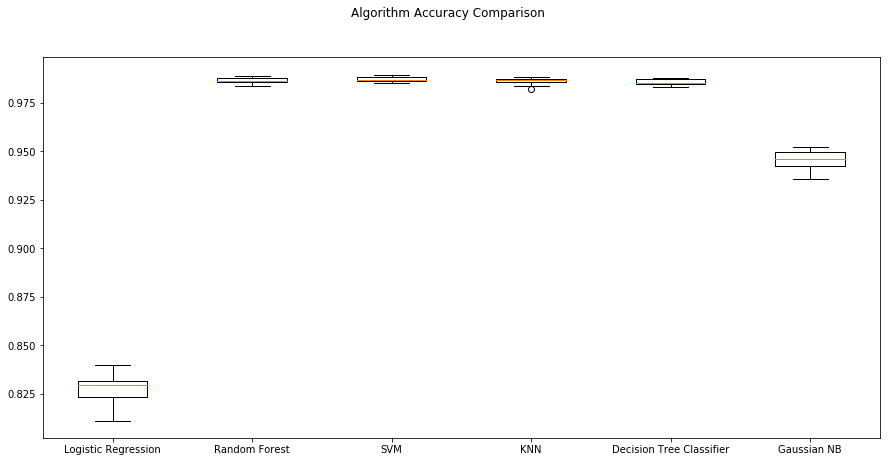

In [35]:

fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

### Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems.The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

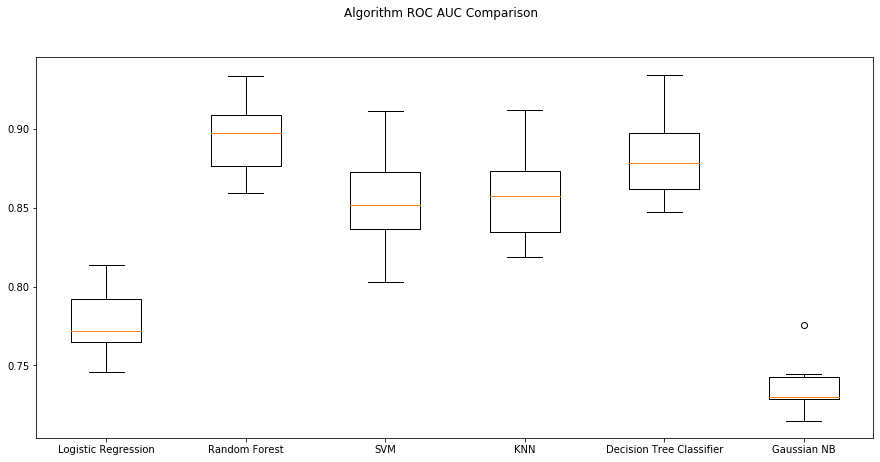

In [36]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

# Based on our ROC AUC comparison analysis Random Forest show the highest mean AUC scores. 

## Random Forest is a popular and versatile machine learning method that is capable of solving both regression and classification. Random Forest is a brand of Ensemble learning, as it relies on an ensemble of decision trees. It aggregates Classification (or Regression) Trees. A decision tree is composed of a series of decisions that can be used to classify an observation in a dataset.

### Random Forest fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. Random Forest can handle a large number of features, and is helpful for estimating which of your variables are important in the underlying data being modeled.